In [17]:
#importing packages and libraries

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib import gridspec as gridspec

In [2]:
#reading in file of demographic data and geometry data
demo = gpd.read_file("/Users/morganbernstein/Downloads/demo_beat_data/demographic_summary_arrests_per_beat.shp")
#35 rows, one for each beat, with percents of [race] by beat
by_beat = pd.read_csv('/Users/morganbernstein/Desktop/Data+/SToPAGetDurhamData/10 Clean Data/GROUPEDBY_BEAT.csv', index_col = [0])

#merging dataset with the total arrests by beat
data = pd.merge(demo, by_beat[["LAWBEAT", "Black", "White", "Asian", "Unknown", "Indigenous", "total"]], left_on = "Beat", right_on = "LAWBEAT")
data.set_index("Beat", inplace = True)

In [4]:
#making new columns to represent the percent of residents and percent of arrests per beat

data["percent_white"] = round(data["white_only"] / data["Total_"], 5)
data["percent_poc"] = round(data["poc"] / data["Total_"], 5)
data["percent_apb"] = round(data["any_part_b"] / data["Total_"], 5)

data["percent_white_A"] = round(data["White"] / data["total"], 5)
data["percent_black_A"] = round(data["Black"] / data["total"], 5)
data["percent_poc_A"] = round(1 - data["percent_white_A"], 5)

#making a log ratio column to show the percent of arrests / percent of residents
# per race for each of the police beats
data["log_B"] = data["percent_black_A"] / data["percent_apb"]
data["log_W"] = round(data["percent_white_A"] / data["percent_white"], 5)
data["log_POC"] = round(data["percent_poc_A"] / data["percent_poc"], 5)

In [6]:
#dropping duplicates
data = data.drop_duplicates(subset = "percent_black_A")
#re-ordering columns within the dataset
data = data[["percent_black_A", "percent_poc_A", "percent_white_A", "percent_white", "percent_apb", "percent_poc"]]
data = data[["percent_apb", "percent_black_A", "percent_white", "percent_white_A", "percent_poc", "percent_poc_A"]]
#renaming coumns within the dataset
data = data.rename(columns={'percent_apb': 'Percent Black Residents', 'percent_black_A': 'Percent Black Arrests'})
data = data.rename(columns={'percent_white': 'Percent White Residents', 'percent_white_A': 'Percent White Arrests'})
data = data.rename(columns={'percent_poc': 'Percent POC Residents', 'percent_poc_A': 'Percent POC Arrests'})

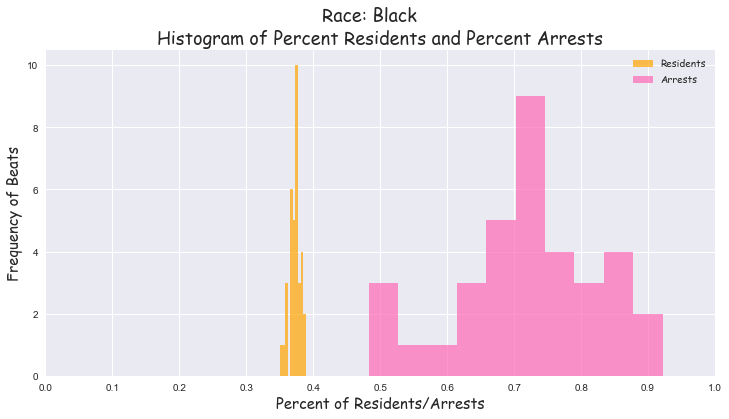

In [13]:
#making a histogram showing the distribution of percent  of black residents 
# and percent of black arrests

from matplotlib.pyplot import figure
figure(figsize=(12, 6))

plt.hist(data["Percent Black Residents"], alpha=0.7, label='Residents', color = 'orange')
plt.hist(data["Percent Black Arrests"], alpha=0.7, label='Arrests', color = 'hotpink')

plt.legend(loc='upper right', prop={'family': 'Comic Sans MS'})

plt.title("Histogram of Percent Residents and Percent Arrests", size = 18, family = "Comic Sans MS")
plt.suptitle("Race: Black", size = 18, family = "Comic Sans MS")
plt.xlabel("Percent of Residents/Arrests", size = 15, family = "Comic Sans MS")
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

plt.ylabel("Frequency of Beats", size = 15, family = "Comic Sans MS")
plt.style.use('seaborn-darkgrid')
plt.show()

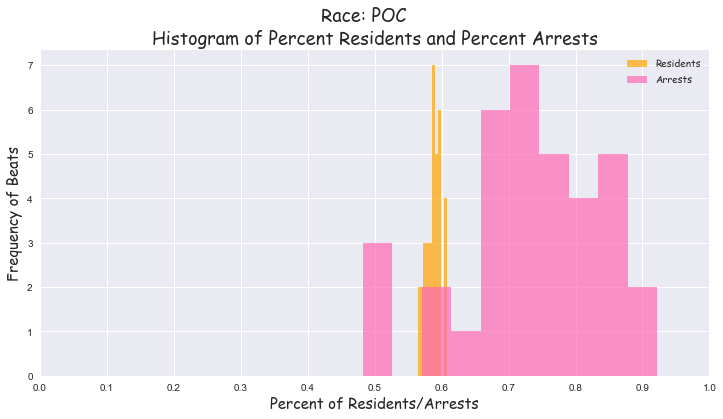

In [12]:
#making a histogram showing the distribution of percent  of poc residents 
# and percent of poc arrests

from matplotlib.pyplot import figure
figure(figsize=(12, 6))

plt.hist(data["Percent POC Residents"], alpha=0.7, label='Residents', color = 'orange')
plt.hist(data["Percent POC Arrests"], alpha=0.7, label='Arrests', color = 'hotpink')

plt.legend(loc='upper right', prop={'family': 'Comic Sans MS'})

plt.title("Histogram of Percent Residents and Percent Arrests", size = 18, family = "Comic Sans MS")
plt.suptitle("Race: POC", size = 18, family = "Comic Sans MS")
plt.xlabel("Percent of Residents/Arrests", size = 15, family = "Comic Sans MS")
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

plt.ylabel("Frequency of Beats", size = 15, family = "Comic Sans MS")
plt.style.use('seaborn-darkgrid')
plt.show()

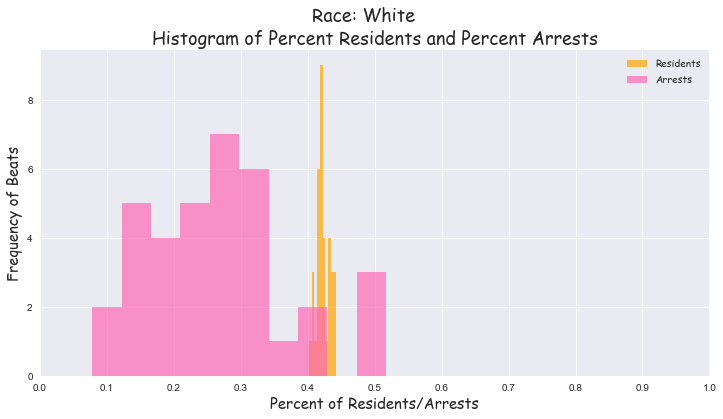

In [14]:
#making a histogram showing the distribution of percent  of white residents 
# and percent of white arrests

from matplotlib.pyplot import figure
figure(figsize=(12, 6))

plt.hist(data["Percent White Residents"], alpha=0.7, label='Residents', color = 'orange')
plt.hist(data["Percent White Arrests"], alpha=0.7, label='Arrests', color = 'hotpink')

plt.legend(loc='upper right', prop={'family': 'Comic Sans MS'})

plt.title("Histogram of Percent Residents and Percent Arrests", size = 18, family = "Comic Sans MS")
plt.suptitle("Race: White", size = 18, family = "Comic Sans MS")
plt.xlabel("Percent of Residents/Arrests", size = 15, family = "Comic Sans MS")
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

plt.ylabel("Frequency of Beats", size = 15, family = "Comic Sans MS")
plt.style.use('seaborn-darkgrid')
plt.show()

Text(0, 0.5, 'Frequency of Beats')

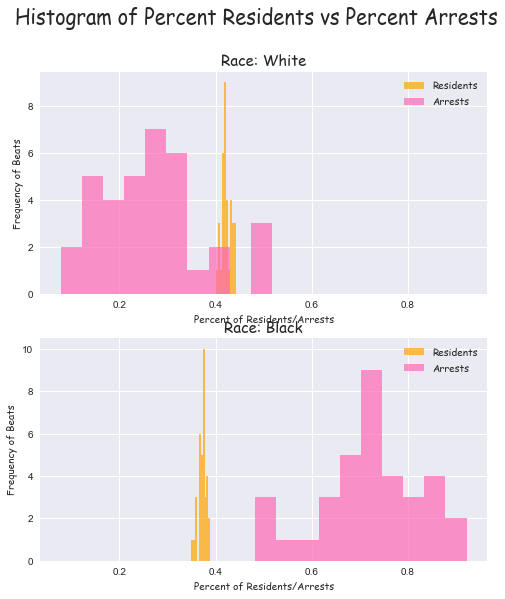

In [18]:
#combining histograms for the races white and black into one figure

#create a space to put the plots, specify size of the space, set the space equal to a variable (fig)
fig = plt.figure(figsize = (8,9))

fig.suptitle('Histogram of Percent Residents vs Percent Arrests', size=20, family = "Comic Sans MS")

#defining hwo the subplots will be placed in the figure, 1 corresponds to number of rows, 2 is number of columns, width ratios is how big the subplots will be
gs = gridspec.GridSpec(2, 1, width_ratios = [1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

ax1.hist(data["Percent White Residents"], alpha=0.7, label='Residents', color = 'orange')
ax1.hist(data["Percent White Arrests"], alpha=0.7, label='Arrests', color = 'hotpink')

ax1.legend(loc='upper right', prop={'family': 'Comic Sans MS'})
ax1.set_title("Race: White", size = 15, family = "Comic Sans MS")
ax1.set_xlabel("Percent of Residents/Arrests", size = 10, family = "Comic Sans MS")
ax1.set_ylabel("Frequency of Beats", size = 10, family = "Comic Sans MS")


ax2.hist(data["Percent Black Residents"], alpha=0.7, label='Residents', color = 'orange')
ax2.hist(data["Percent Black Arrests"], alpha=0.7, label='Arrests', color = 'hotpink')

ax2.legend(loc='upper right', prop={'family': 'Comic Sans MS'})
ax2.set_title("Race: Black", size = 15, family = "Comic Sans MS")
ax2.set_xlabel("Percent of Residents/Arrests", size = 10, family = "Comic Sans MS")
ax2.set_ylabel("Frequency of Beats", size = 10, family = "Comic Sans MS")

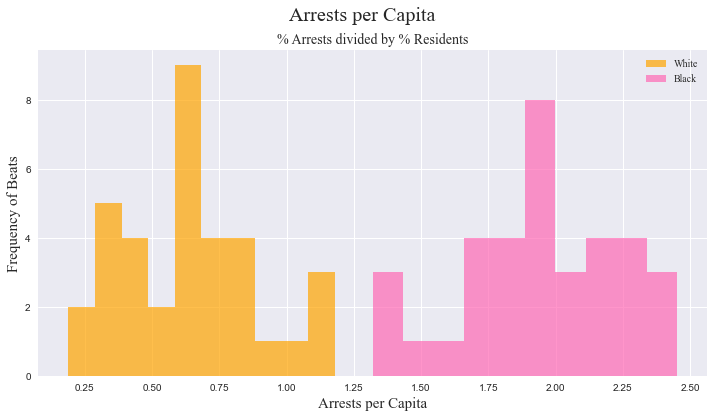

In [20]:
#creating a histogram of the arrests per capita for black and white residents

data["Percent Black"] = data["Percent Black Arrests"] / data["Percent Black Residents"]
data["Percent White"] = data["Percent White Arrests"] / data["Percent White Residents"]

from matplotlib.pyplot import figure
figure(figsize=(12, 6))

plt.hist(data["Percent White"], alpha=0.7, label='White', color = 'orange')
plt.hist(data["Percent Black"], alpha=0.7, label='Black', color = 'hotpink')

plt.legend(loc='upper right', prop={'family': 'Times New Roman'})

plt.title("% Arrests divided by % Residents", size = 14, family = "Times New Roman")
plt.suptitle("Arrests per Capita", size = 20, family = "Times New Roman")
plt.xlabel("Arrests per Capita", size = 15, family = "Times New Roman")
plt.xticks([.25, .5, .75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
#plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

plt.ylabel("Frequency of Beats", size = 15, family = "Times New Roman")
plt.show()

In [21]:
#reading in dataset of percent arrsts per beat during the day and night
day_night = pd.read_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/20 Analysis/day_night_hist.csv", index_col = [0])

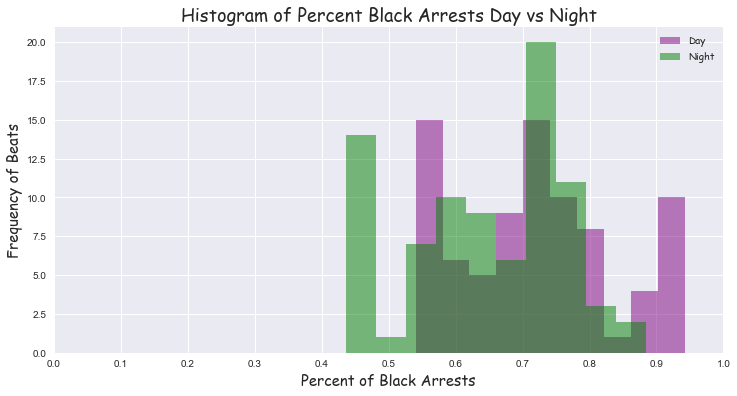

In [22]:
#making a histogram to look at the distribution over the beats of percent 
# of black arrests during the day and night

from matplotlib.pyplot import figure
figure(figsize=(12, 6))

plt.hist(day_night["Percent_Black_Arrests"], alpha=0.5, label='Day', color = 'purple')
plt.hist(day_night["nightb"], alpha=0.5, label='Night', color = 'green')

plt.legend(loc='upper right', prop={'family': 'Comic Sans MS'})

plt.title("Histogram of Percent Black Arrests Day vs Night", size = 18, family = "Comic Sans MS")
plt.xlabel("Percent of Black Arrests", size = 15, family = "Comic Sans MS")
plt.xticks([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
plt.ylabel("Frequency of Beats", size = 15, family = "Comic Sans MS")
plt.show()

In [23]:
#not important, hypothesis test in python to look at the difference in 
# average percent of black arrests during the day and night

from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# can we assume anything from our sample
significance = 0.5

# our samples - 82% are good in one, and ~79% are good in the other
# note - the samples do not need to be the same size
sample_success_a = 0.718138 * 35
sample_size_a = 35
sample_success_b = 0.644382 * 35
sample_size_b = 35


# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])

# note, no need for a Ho value here - it's derived from the other parameters
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

# report
print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
   print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z_stat: 0.662, p_value: 0.508
Fail to reject the null hypothesis - we have nothing else to say
